Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import pickle

warnings.filterwarnings('ignore')

Data Loading and Preprocessing

In [3]:
df=pd.read_csv("phone_usage_india.csv")
print(df.shape)
df.head()

(17686, 16)


User ID  Age  Gender   Location Phone Brand       OS  Screen Time (hrs/day)  \
0  U00001   53    Male     Mumbai        Vivo  Android                    3.7   
1  U00002   60   Other      Delhi      Realme      iOS                    9.2   
2  U00003   37  Female  Ahmedabad       Nokia  Android                    4.5   
3  U00004   32    Male       Pune     Samsung  Android                   11.0   
4  U00005   16    Male     Mumbai      Xiaomi      iOS                    2.2   

   Data Usage (GB/month)  Calls Duration (mins/day)  Number of Apps Installed  \
0                   23.9                       37.9                       104   
1                   28.1                       13.7                       169   
2                   12.3                       66.8                        96   
3                   25.6                      156.2                       146   
4                    2.5                      236.2                        86   

   Social Media Time (hrs/day)  E-commerce Spend (INR/month)  \
0                          3.9                           469   
1                          2.8                          4997   
2                          3.0                          2381   
3                          5.2                          1185   
4                          5.5                           106   

   Streaming Time (hrs/day)  Gaming Time (hrs/day)  \
0                       5.2                    4.1   
1                       5.1                    0.4   
2                       1.7                    2.9   
3                       3.2                    0.3   
4                       3.4                    2.3   

   Monthly Recharge Cost (INR)    Primary Use  
0                          803      Education  
1                         1526         Gaming  
2                         1619  Entertainment  
3                         1560  Entertainment  
4                          742   Social Media

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 non-null  float64
 13  G

In [5]:
df.describe()

Age  Screen Time (hrs/day)  Data Usage (GB/month)  \
count  17686.000000           17686.000000           17686.000000   
mean      37.584247               6.546376              25.411257   
std       13.338252               3.172677              14.122167   
min       15.000000               1.000000               1.000000   
25%       26.000000               3.800000              13.200000   
50%       38.000000               6.600000              25.300000   
75%       49.000000               9.300000              37.600000   
max       60.000000              12.000000              50.000000   

       Calls Duration (mins/day)  Number of Apps Installed  \
count               17686.000000              17686.000000   
mean                  151.405846                104.584869   
std                    84.923353                 55.217097   
min                     5.000000                 10.000000   
25%                    77.325000                 57.000000   
50%                   150.600000                104.000000   
75%                   223.900000                152.000000   
max                   300.000000                200.000000   

       Social Media Time (hrs/day)  E-commerce Spend (INR/month)  \
count                 17686.000000                  17686.000000   
mean                      3.252369                   5075.707848   
std                       1.590223                   2871.604841   
min                       0.500000                    100.000000   
25%                       1.900000                   2587.500000   
50%                       3.200000                   5052.000000   
75%                       4.600000                   7606.000000   
max                       6.000000                  10000.000000   

       Streaming Time (hrs/day)  Gaming Time (hrs/day)  \
count              17686.000000           17686.000000   
mean                   4.250616               2.490874   
std                    2.155683               1.446003   
min                    0.500000               0.000000   
25%                    2.400000               1.200000   
50%                    4.200000               2.500000   
75%                    6.100000               3.700000   
max                    8.000000               5.000000   

       Monthly Recharge Cost (INR)  
count                 17686.000000  
mean                   1042.785367  
std                     552.502067  
min                     100.000000  
25%                     561.000000  
50%                    1040.000000  
75%                    1521.750000  
max                    2000.000000

In [6]:
df.isnull().sum()

User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df[['Phone Brand', 'OS']]

Phone Brand       OS
0            Vivo  Android
1          Realme      iOS
2           Nokia  Android
3         Samsung  Android
4          Xiaomi      iOS
...           ...      ...
17681       Apple      iOS
17682        Oppo      iOS
17683      Realme  Android
17684        Vivo  Android
17685        Oppo      iOS

[17686 rows x 2 columns]

In [9]:
df['OS'] = df['Phone Brand'].apply(lambda col :  'iOS' if col=='Apple' else 'Android')

In [10]:
df.groupby(['Phone Brand', 'OS']).size().reset_index(name='Count')

Phone Brand       OS  Count
0         Apple      iOS   1775
1  Google Pixel  Android   1729
2      Motorola  Android   1717
3         Nokia  Android   1816
4       OnePlus  Android   1807
5          Oppo  Android   1716
6        Realme  Android   1762
7       Samsung  Android   1764
8          Vivo  Android   1797
9        Xiaomi  Android   1803

In [11]:
df.head()

User ID  Age  Gender   Location Phone Brand       OS  Screen Time (hrs/day)  \
0  U00001   53    Male     Mumbai        Vivo  Android                    3.7   
1  U00002   60   Other      Delhi      Realme  Android                    9.2   
2  U00003   37  Female  Ahmedabad       Nokia  Android                    4.5   
3  U00004   32    Male       Pune     Samsung  Android                   11.0   
4  U00005   16    Male     Mumbai      Xiaomi  Android                    2.2   

   Data Usage (GB/month)  Calls Duration (mins/day)  Number of Apps Installed  \
0                   23.9                       37.9                       104   
1                   28.1                       13.7                       169   
2                   12.3                       66.8                        96   
3                   25.6                      156.2                       146   
4                    2.5                      236.2                        86   

   Social Media Time (hrs/day)  E-commerce Spend (INR/month)  \
0                          3.9                           469   
1                          2.8                          4997   
2                          3.0                          2381   
3                          5.2                          1185   
4                          5.5                           106   

   Streaming Time (hrs/day)  Gaming Time (hrs/day)  \
0                       5.2                    4.1   
1                       5.1                    0.4   
2                       1.7                    2.9   
3                       3.2                    0.3   
4                       3.4                    2.3   

   Monthly Recharge Cost (INR)    Primary Use  
0                          803      Education  
1                         1526         Gaming  
2                         1619  Entertainment  
3                         1560  Entertainment  
4                          742   Social Media

In [12]:
# 1. Drop 'User ID' (not useful for ML)
df.drop(columns=['User ID'], inplace=True)

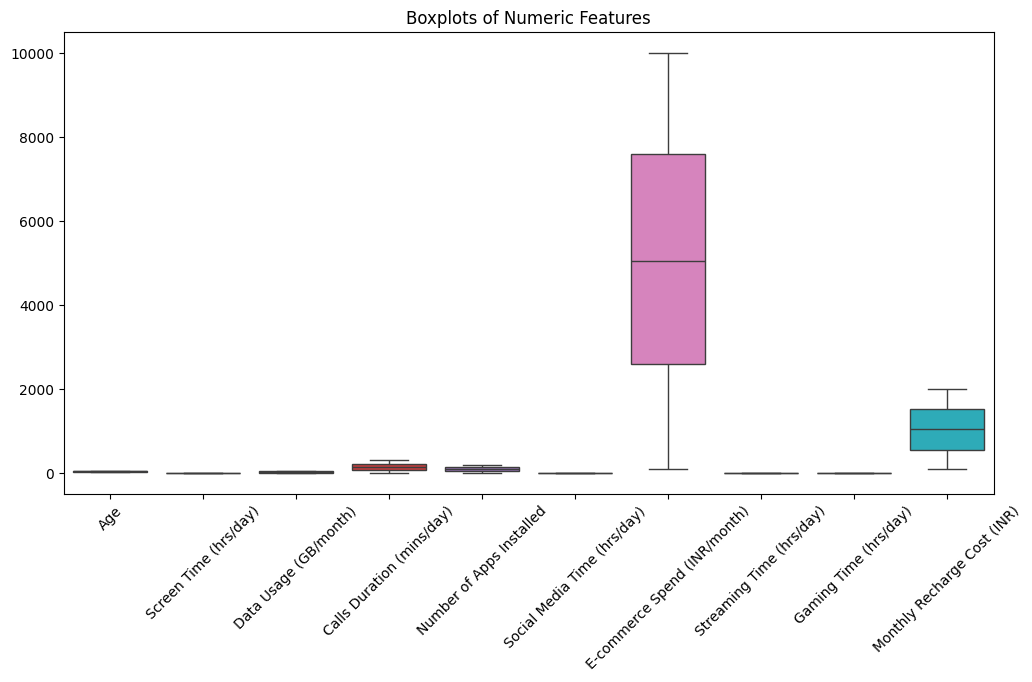

In [13]:
# Boxplots for numeric features

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols], orient="v")  # vertical boxplots
plt.xticks(rotation=45)
plt.title("Boxplots of Numeric Features")
plt.show()


No outliers has been detected.

In [14]:
df.to_csv("cleaned_phone_usage_india.csv", index=False)

In [15]:
df.head()

Age  Gender   Location Phone Brand       OS  Screen Time (hrs/day)  \
0   53    Male     Mumbai        Vivo  Android                    3.7   
1   60   Other      Delhi      Realme  Android                    9.2   
2   37  Female  Ahmedabad       Nokia  Android                    4.5   
3   32    Male       Pune     Samsung  Android                   11.0   
4   16    Male     Mumbai      Xiaomi  Android                    2.2   

   Data Usage (GB/month)  Calls Duration (mins/day)  Number of Apps Installed  \
0                   23.9                       37.9                       104   
1                   28.1                       13.7                       169   
2                   12.3                       66.8                        96   
3                   25.6                      156.2                       146   
4                    2.5                      236.2                        86   

   Social Media Time (hrs/day)  E-commerce Spend (INR/month)  \
0                          3.9                           469   
1                          2.8                          4997   
2                          3.0                          2381   
3                          5.2                          1185   
4                          5.5                           106   

   Streaming Time (hrs/day)  Gaming Time (hrs/day)  \
0                       5.2                    4.1   
1                       5.1                    0.4   
2                       1.7                    2.9   
3                       3.2                    0.3   
4                       3.4                    2.3   

   Monthly Recharge Cost (INR)    Primary Use  
0                          803      Education  
1                         1526         Gaming  
2                         1619  Entertainment  
3                         1560  Entertainment  
4                          742   Social Media

Exploratory Data Analysis (EDA)

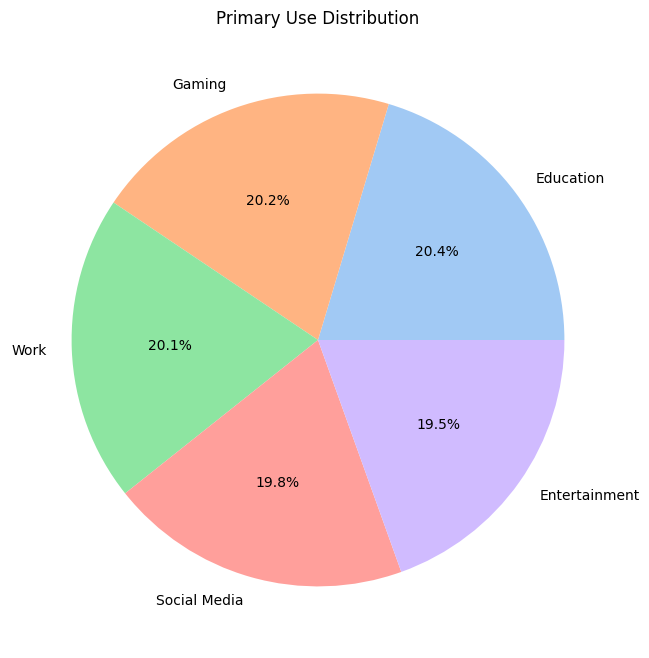

In [16]:
# Distribution of app usage time across different user classes

phone_brand_counts = df["Primary Use"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(phone_brand_counts, labels=phone_brand_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Primary Use Distribution")
plt.show()



In [17]:
# Relationship between screen-on time and battery consumption

# Create a battery consumption proxy (weighted sum of heavy usage features)
df['Battery_Proxy'] = (
    df['Screen Time (hrs/day)']*0.4 + 
    df['Data Usage (GB/month)']*0.2 + 
    df['Social Media Time (hrs/day)']*0.15 + 
    df['Streaming Time (hrs/day)']*0.15 + 
    df['Gaming Time (hrs/day)']*0.1
)

# Correlation between Screen Time and Battery Proxy
corr = df['Screen Time (hrs/day)'].corr(df['Battery_Proxy'])
print(f"Correlation between Screen Time and Battery Consumption Proxy: {corr:.2f}")



Correlation between Screen Time and Battery Consumption Proxy: 0.40


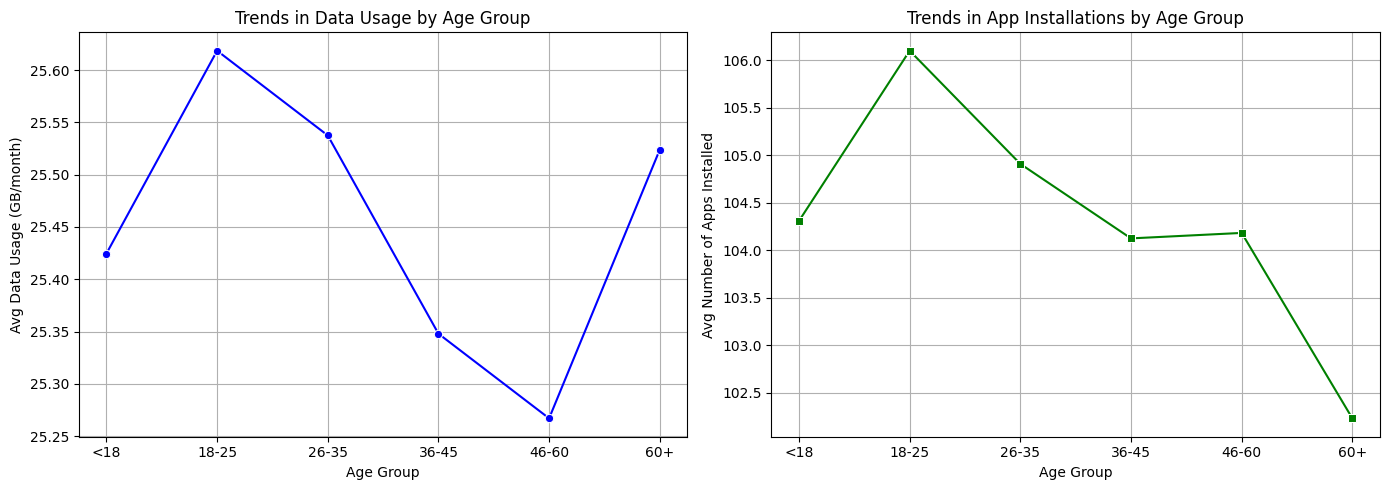

In [18]:
# Trends in data usage and app installations by age group
# Create age groups (adjust bins as per your dataset)
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18','18-25','26-35','36-45','46-60','60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group
age_trends = df.groupby('Age_Group')[['Data Usage (GB/month)', 'Number of Apps Installed']].mean().reset_index()

# Plot side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Data Usage plot
sns.lineplot(x='Age_Group', y='Data Usage (GB/month)', data=age_trends, marker='o', ax=axes[0], color='blue')
axes[0].set_title("Trends in Data Usage by Age Group")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Avg Data Usage (GB/month)")
axes[0].grid(True)

# Number of Apps Installed plot
sns.lineplot(x='Age_Group', y='Number of Apps Installed', data=age_trends, marker='s', ax=axes[1], color='green')
axes[1].set_title("Trends in App Installations by Age Group")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Avg Number of Apps Installed")
axes[1].grid(True)

plt.tight_layout()
plt.show()


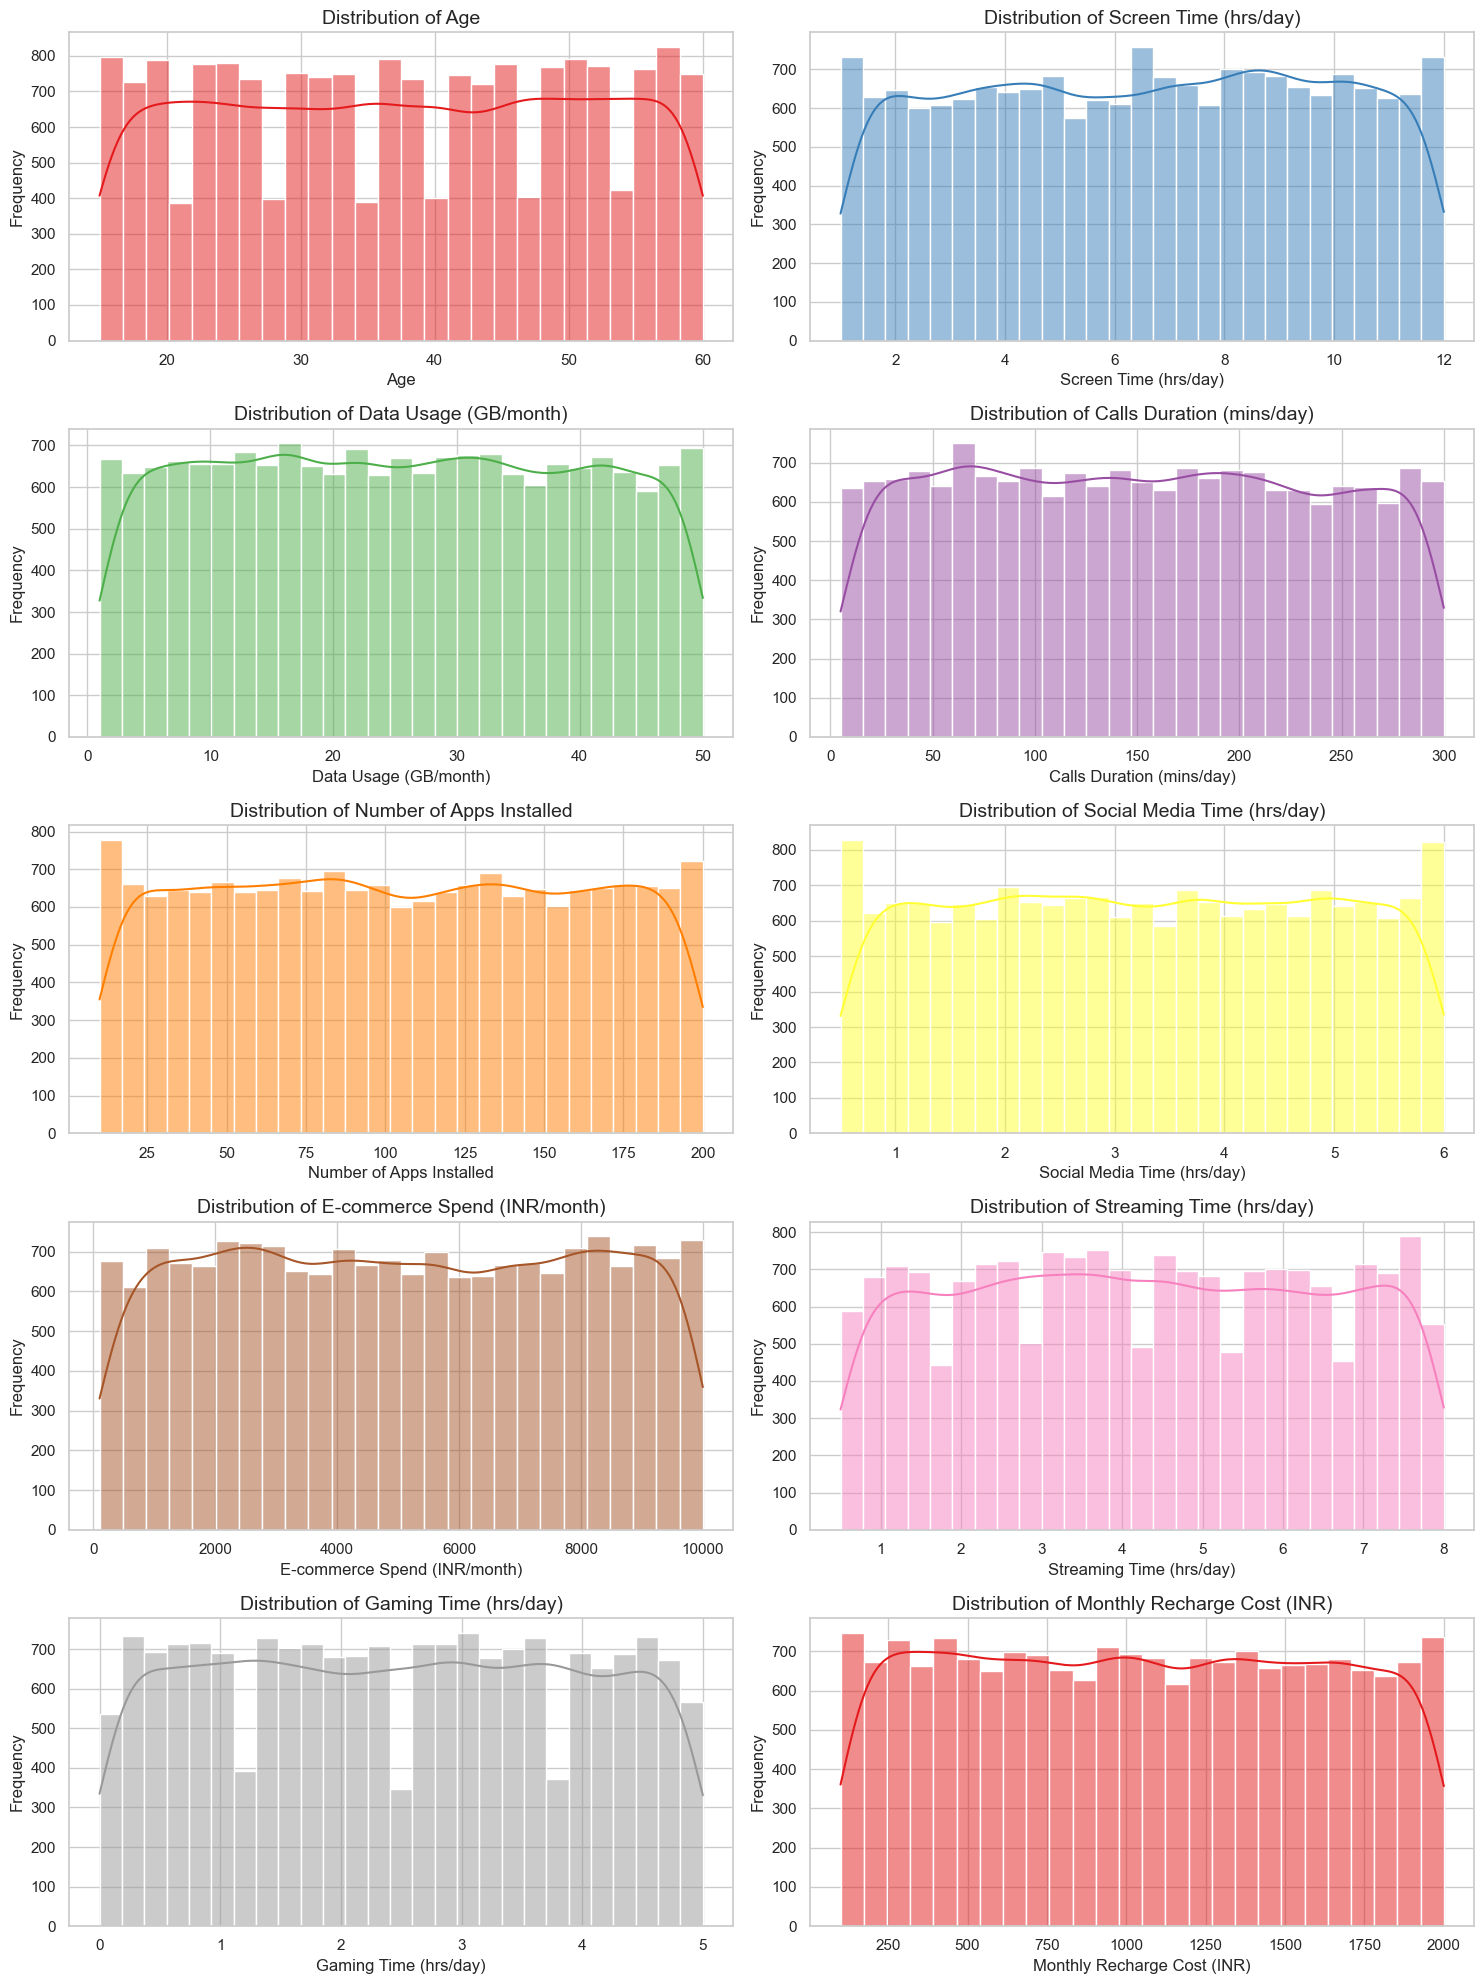

In [19]:
# Histograms for app usage time and battery consumption
sns.set_theme(style="whitegrid")

numeric_cols = [
    "Age", "Screen Time (hrs/day)", "Data Usage (GB/month)",
    "Calls Duration (mins/day)", "Number of Apps Installed",
    "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)", "Monthly Recharge Cost (INR)"
]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color=sns.color_palette("Set1", len(numeric_cols))[i], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

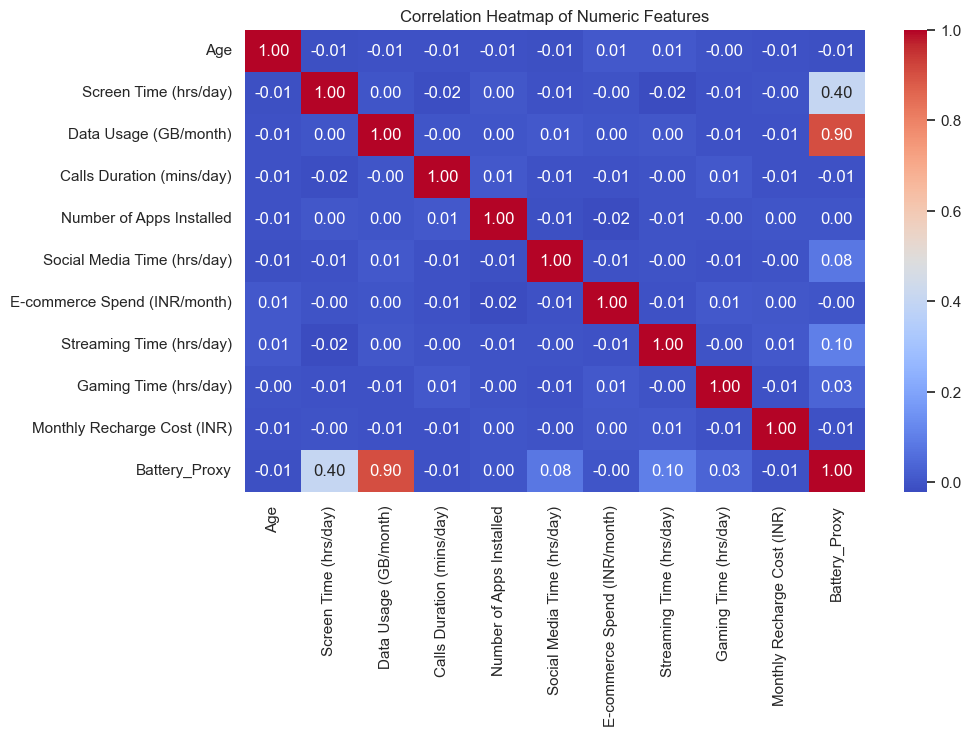

In [20]:
#Heatmaps to visualize feature correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


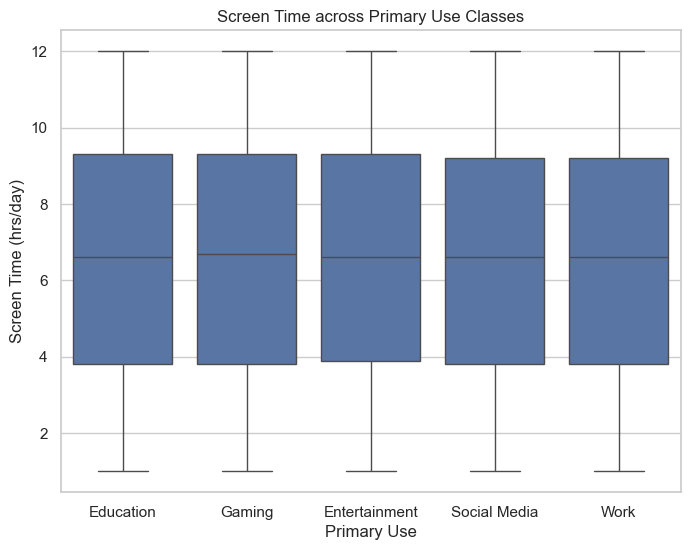

In [21]:
#Box plots to compare screen-on time across user classes
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Primary Use", y="Screen Time (hrs/day)")
plt.title("Screen Time across Primary Use Classes")
plt.xlabel("Primary Use")
plt.ylabel("Screen Time (hrs/day)")
plt.show()


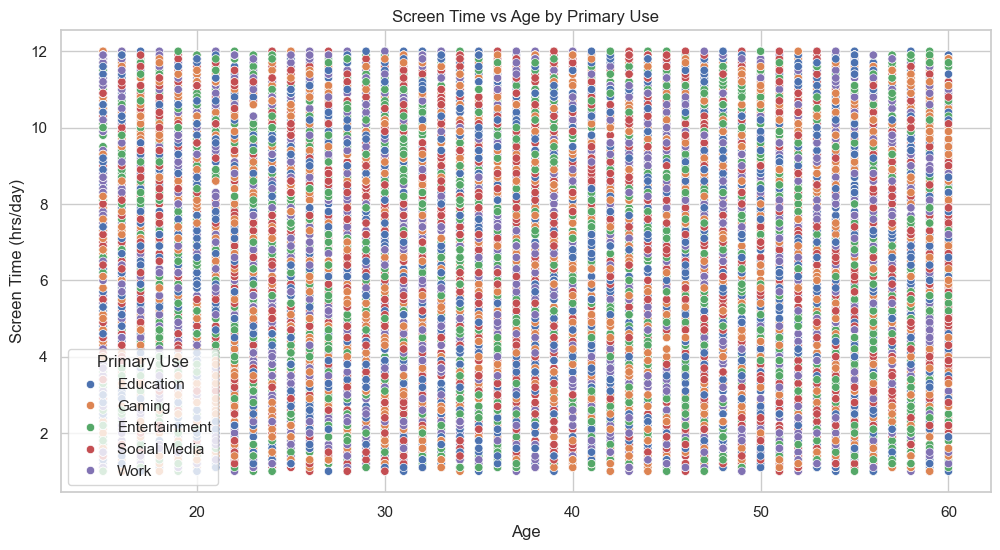

In [22]:
# Screen Time vs Age
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Screen Time (hrs/day)', hue='Primary Use')
plt.title('Screen Time vs Age by Primary Use')
plt.show()

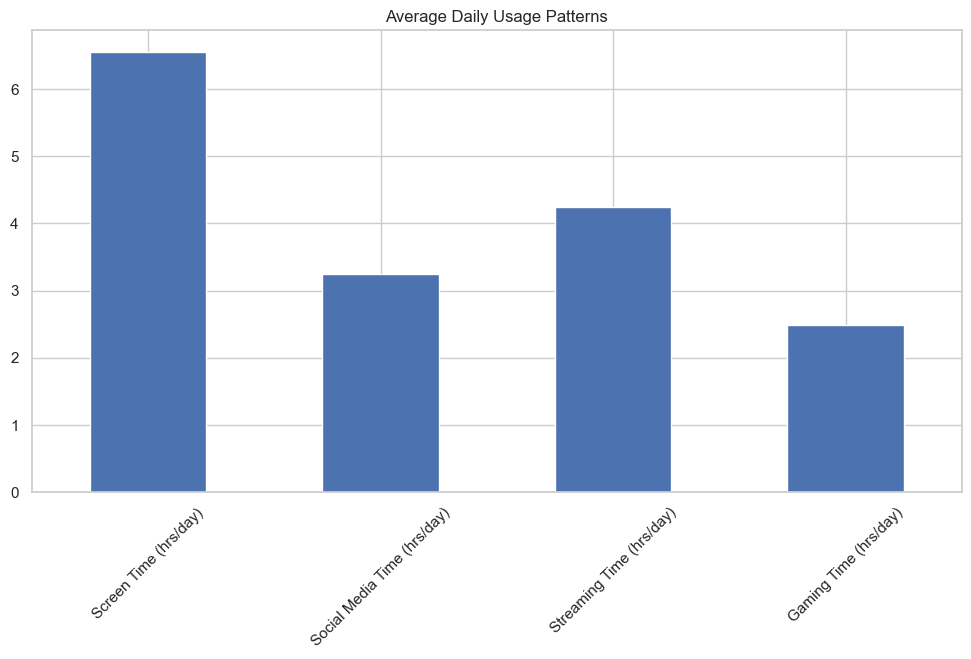

In [23]:
# Average Usage Patterns
usage_cols = ['Screen Time (hrs/day)', 'Social Media Time (hrs/day)', 
                 'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)']
plt.figure(figsize=(12, 6))
df[usage_cols].mean().plot(kind='bar')
plt.title('Average Daily Usage Patterns')
plt.xticks(rotation=45)
plt.show()

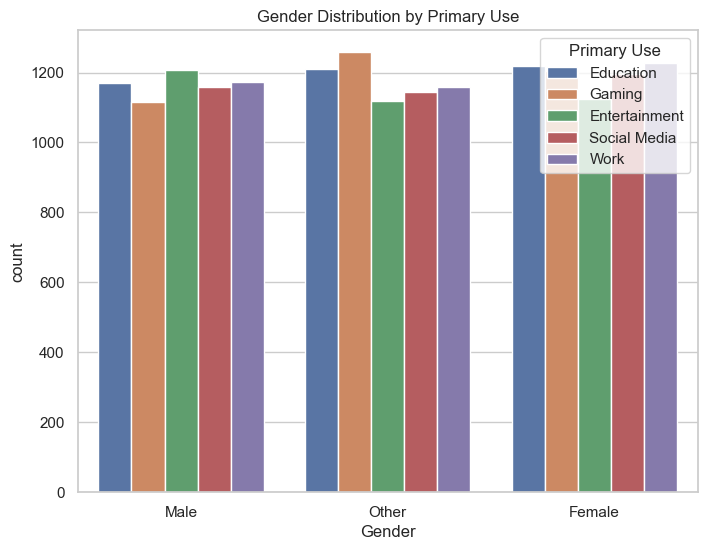

In [24]:
# Gender vs Primary Use
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Primary Use')
plt.title('Gender Distribution by Primary Use')
plt.show()

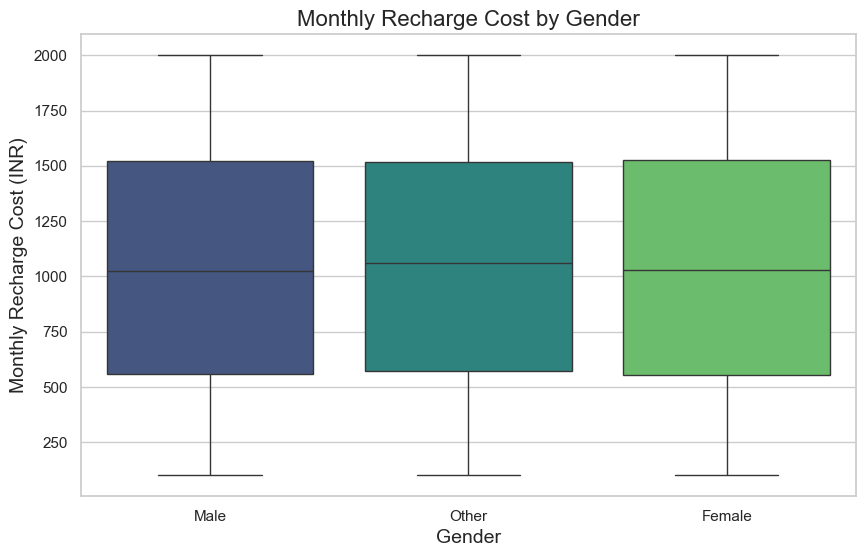

In [25]:
## Gender vs. Monthly Recharge Cost

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="Monthly Recharge Cost (INR)", palette="viridis")
plt.title("Monthly Recharge Cost by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Monthly Recharge Cost (INR)", fontsize=14)
plt.show()

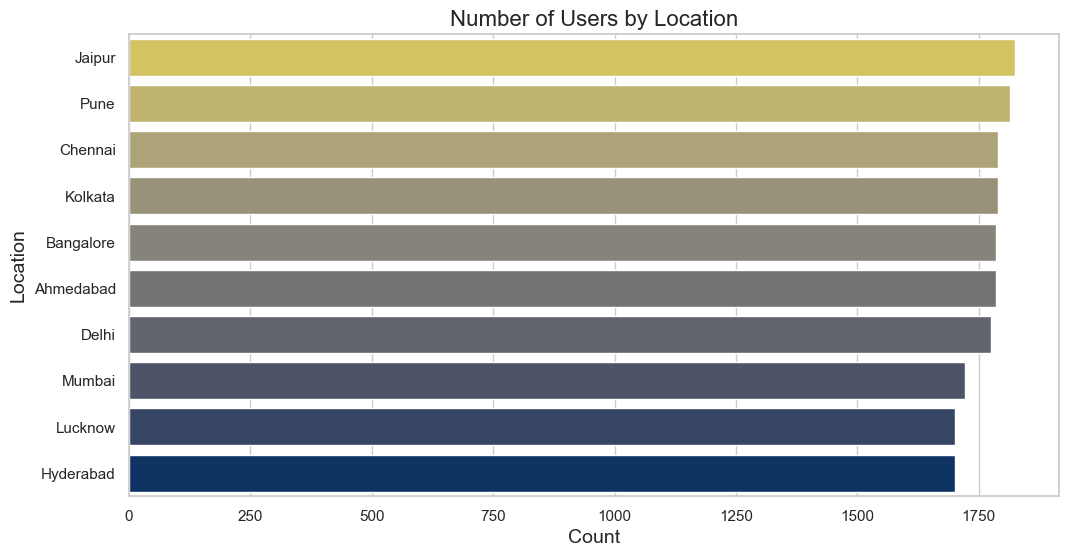

In [26]:
## User Count by Location
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Location", order=df["Location"].value_counts().index, palette="cividis_r")
plt.title("Number of Users by Location", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.show()

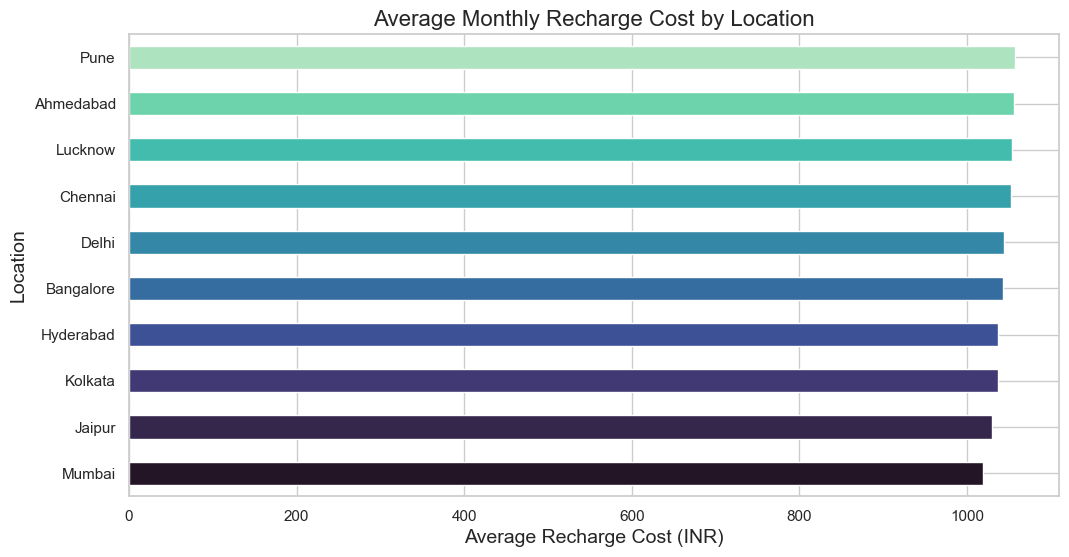

In [27]:
## Average Monthly Recharge Cost by Location

location_recharge = df.groupby("Location")["Monthly Recharge Cost (INR)"].mean().sort_values()

plt.figure(figsize=(12, 6))
location_recharge.plot(kind="barh", color=sns.color_palette("mako", len(location_recharge)))
plt.title("Average Monthly Recharge Cost by Location", fontsize=16)
plt.xlabel("Average Recharge Cost (INR)", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.show()

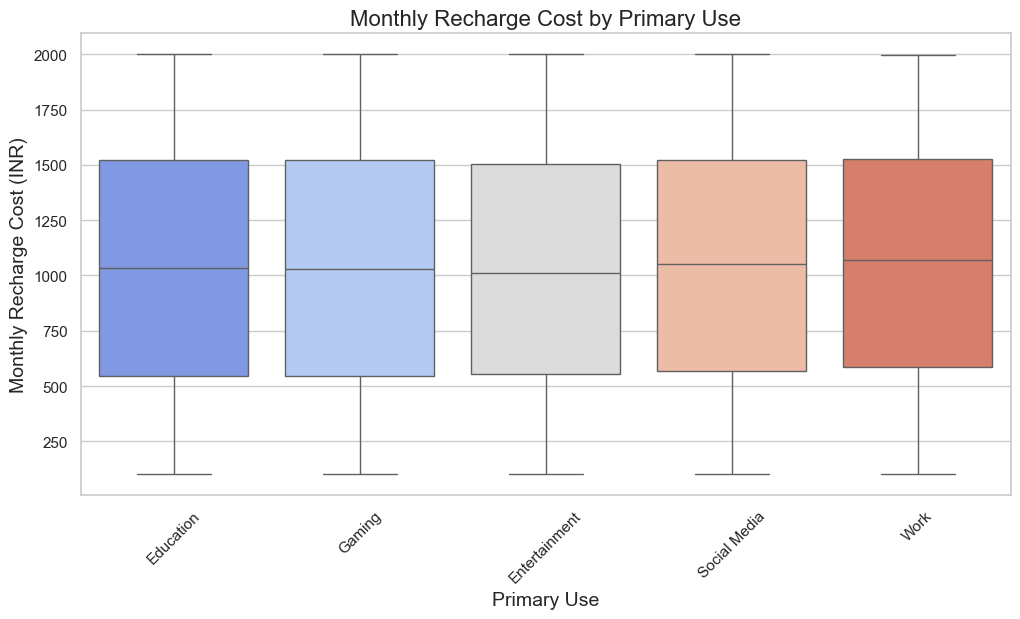

In [28]:
## Monthly Recharge Cost by Primary Use

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Primary Use", y="Monthly Recharge Cost (INR)", palette="coolwarm")
plt.title("Monthly Recharge Cost by Primary Use", fontsize=16)
plt.xlabel("Primary Use", fontsize=14)
plt.ylabel("Monthly Recharge Cost (INR)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

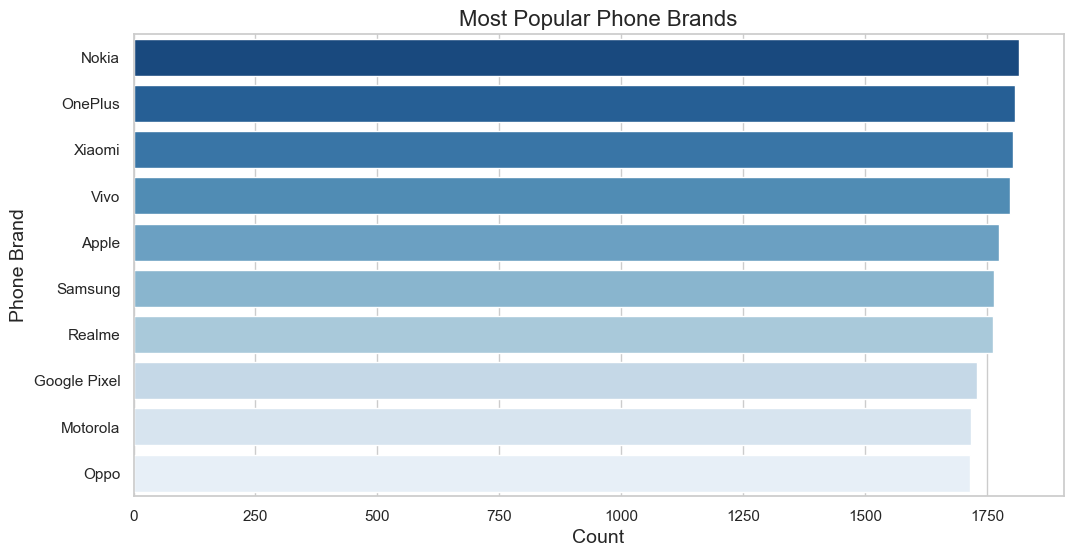

In [29]:
## Most Popular Phone Brands
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Phone Brand", order=df["Phone Brand"].value_counts().index, palette="Blues_r")
plt.title("Most Popular Phone Brands", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Phone Brand", fontsize=14)
plt.show()

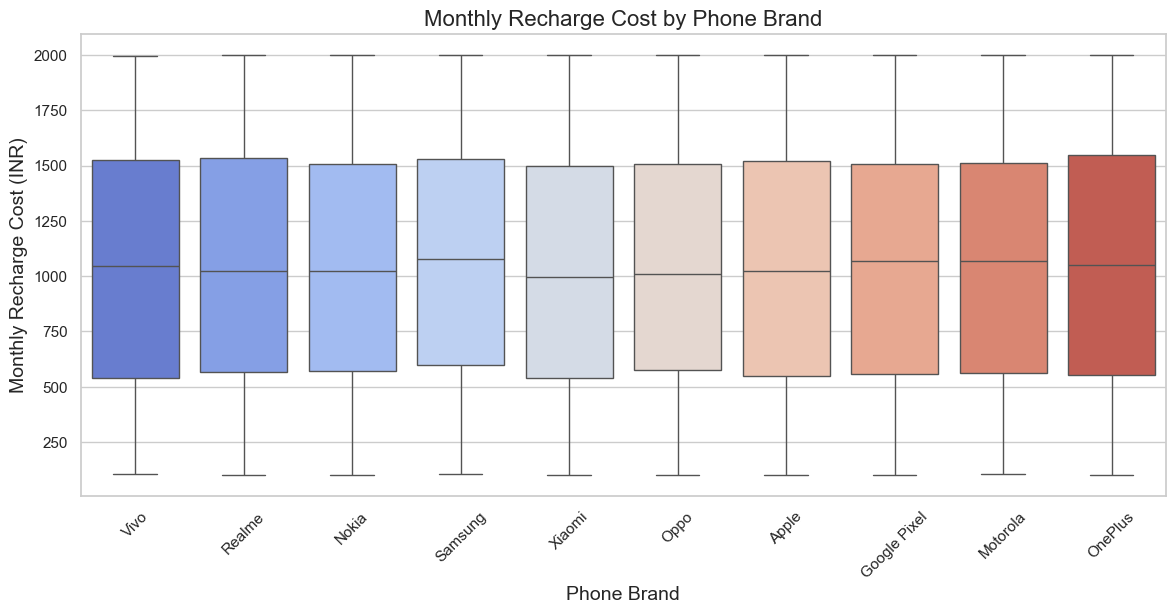

In [30]:
## Monthly Recharge Cost by Phone Brand
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Phone Brand", y="Monthly Recharge Cost (INR)", palette="coolwarm")
plt.title("Monthly Recharge Cost by Phone Brand", fontsize=16)
plt.xlabel("Phone Brand", fontsize=14)
plt.ylabel("Monthly Recharge Cost (INR)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

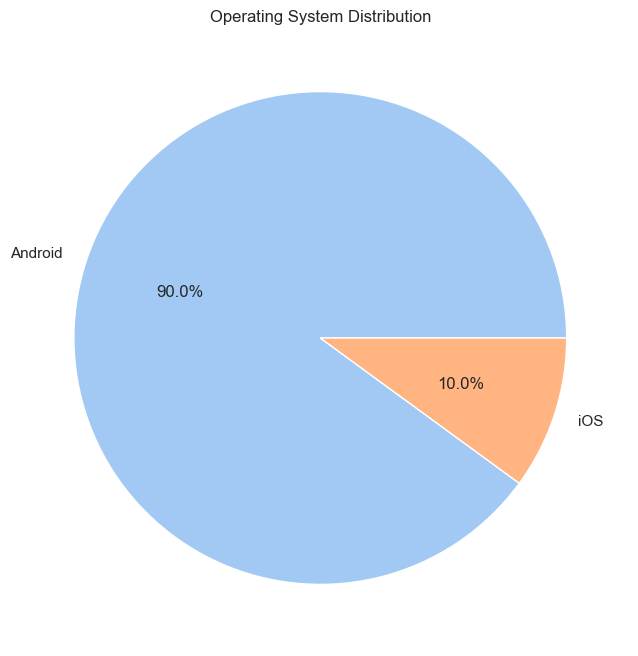

In [31]:
#operating system distribution
phone_brand_counts = df["OS"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(phone_brand_counts, labels=phone_brand_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Operating System Distribution")
plt.show()

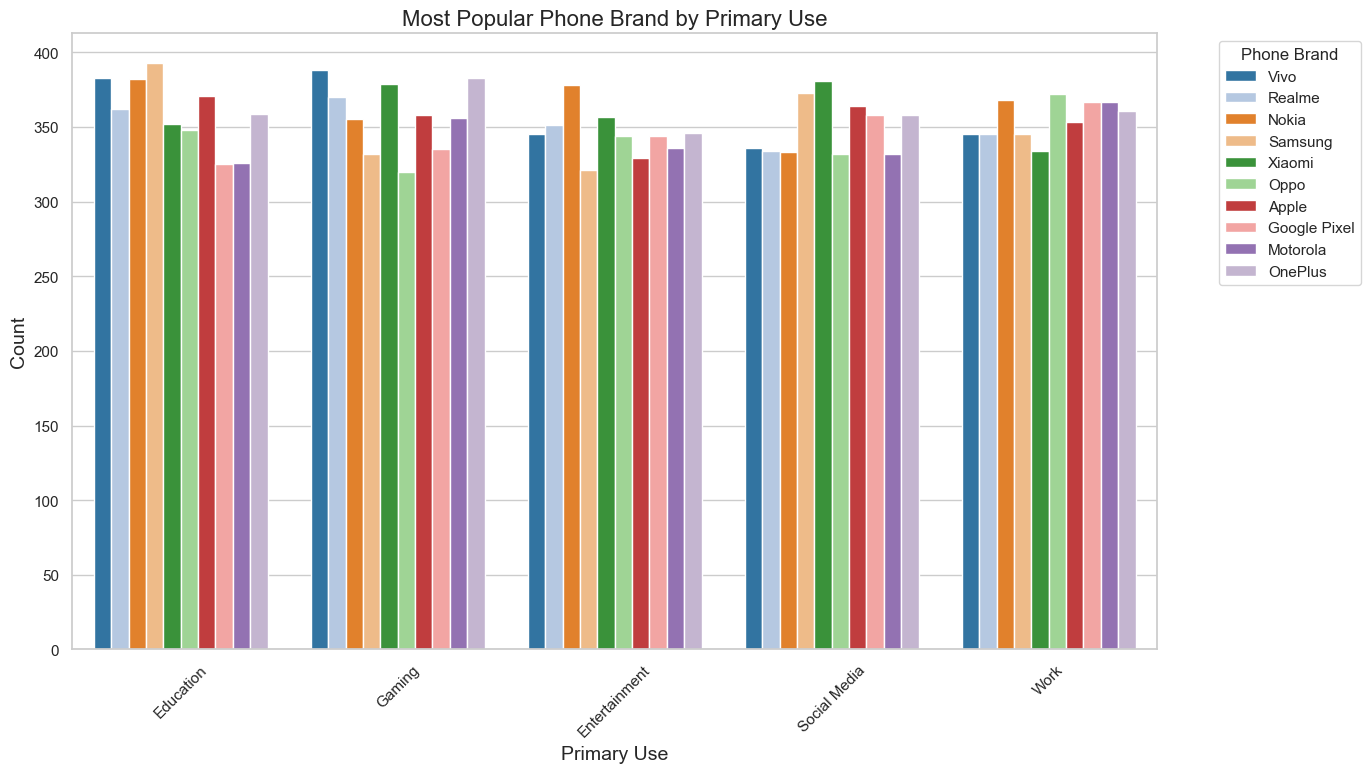

In [32]:
# which phone brand is used the most for each primary use category
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x="Primary Use", hue="Phone Brand", palette="tab20")
plt.title("Most Popular Phone Brand by Primary Use", fontsize=16)
plt.xlabel("Primary Use", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Phone Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Feature Engineering and Preparation

In [33]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Location', 'Phone Brand', 'OS', 'Primary Use']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [34]:
# Select features for modeling
feature_cols = ['Age', 'Screen Time (hrs/day)', 'Data Usage (GB/month)',
                   'Calls Duration (mins/day)', 'Number of Apps Installed',
                   'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
                   'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
                   'Monthly Recharge Cost (INR)', 'Gender', 'OS']

In [35]:
df['Primary Use'] = df['Primary Use'].astype(str)  # Convert to string 

In [36]:
X = df[feature_cols]
y = df['Primary Use']

In [37]:
y = y.astype(int)

In [38]:
 # Scale the features

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler and transform the features
X_scaled = scaler.fit_transform(X)  # Ensure X is defined

# Print mean and standard deviation of features
print("Feature Means:\n", scaler.mean_)
print("\nFeature Std Devs:\n", scaler.scale_)

Feature Means:
 [3.75842474e+01 6.54637566e+00 2.54112575e+01 1.51405846e+02
 1.04584869e+02 3.25236911e+00 5.07570785e+03 4.25061631e+00
 2.49087414e+00 1.04278537e+03 9.95646274e-01 1.00361868e-01]

Feature Std Devs:
 [1.33378747e+01 3.17258754e+00 1.41217682e+01 8.49209524e+01
 5.52155359e+01 1.59017813e+00 2.87152366e+03 2.15562229e+00
 1.44596220e+00 5.52486447e+02 8.18916657e-01 3.00481886e-01]


Machine learning and Clustering

Implementing classification models and Evaluation metrics

Evaluating Classification Models...

Evaluating Logistic Regression...

Detailed Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.18      0.23      0.21       721
           1       0.19      0.18      0.19       690
           2       0.19      0.20      0.19       715
           3       0.18      0.10      0.13       700
           4       0.19      0.22      0.20       712

    accuracy                           0.19      3538
   macro avg       0.19      0.19      0.18      3538
weighted avg       0.19      0.19      0.18      3538


Evaluating Decision Tree...

Detailed Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.25      0.09      0.13       721
           1       0.20      0.27      0.23       690
           2       0.21      0.17      0.19       715
           3       0.20      0.33      0.25       700
           4       0.19      0.1

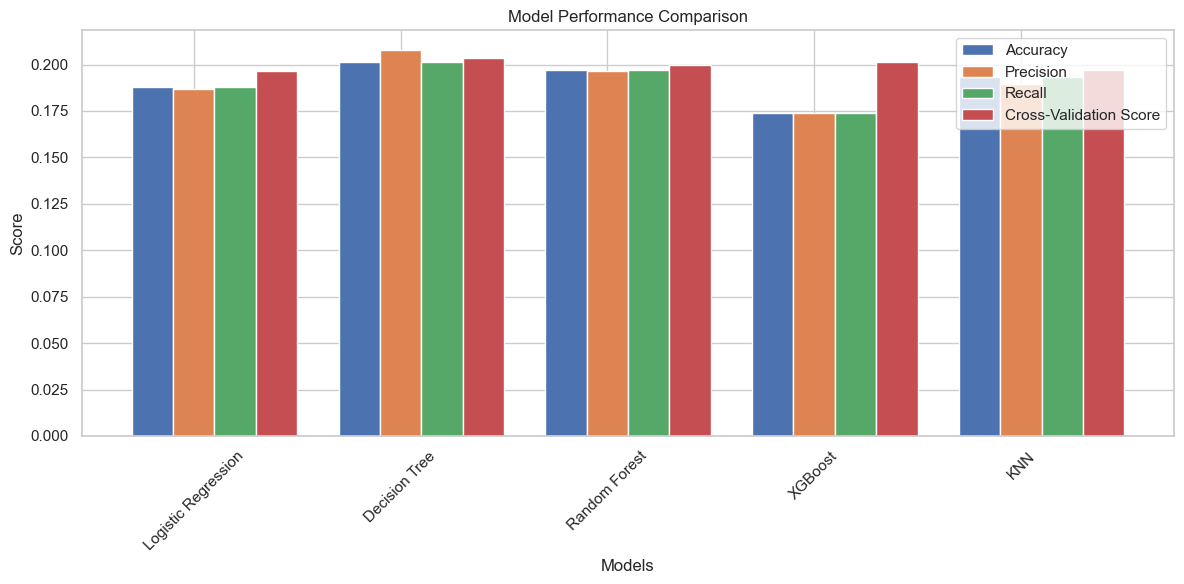

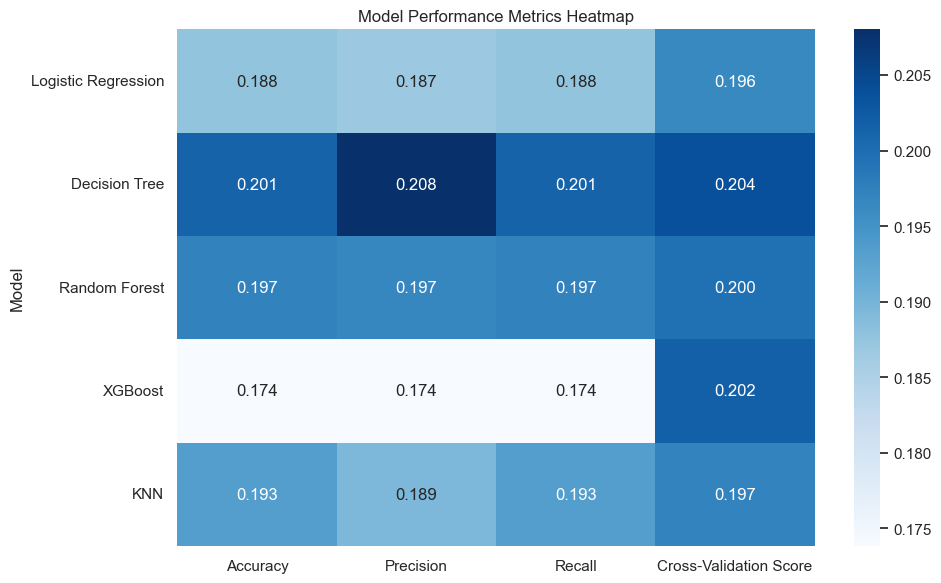


Model Performance Summary:
              Model  Accuracy  Precision   Recall  Cross-Validation Score
Logistic Regression  0.187677   0.186868 0.187677                0.196313
      Decision Tree  0.201244   0.208018 0.201244                0.203777
      Random Forest  0.197287   0.196674 0.197287                0.199537
            XGBoost  0.173827   0.173864 0.173827                0.201629
                KNN  0.193330   0.189329 0.193330                0.197105

🏆 The best model is: Decision Tree (Saved as decision_tree_model.pkl)


In [39]:

def evaluate_classification_models(X, y):
    # Stratify to maintain class balance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight="balanced", random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
        'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='mlogloss', random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)  # Replacing SVM with KNN
    }

    trained_models = {}  # Store trained models
    results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall'])

    # Evaluate each model
    for name, model in models.items():
        print(f"\nEvaluating {name}...")

        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=3)  # Reduce CV folds for speed
        avg_cv_score = np.mean(cv_scores)

        # Store trained model
        trained_models[name] = model

        # Append results to DataFrame
        results_df = pd.concat([results_df, pd.DataFrame({
            'Model': [name],
            'Accuracy': [accuracy],
            'Precision': [precision],
            'Recall': [recall],
            'Cross-Validation Score': [avg_cv_score]
        })], ignore_index=True)

        # Print classification report
        print(f"\nDetailed Classification Report for {name}:")
        print(classification_report(y_test, y_pred))

    # Identify the best model based on cross-validation score
    best_model_name = results_df.loc[results_df['Cross-Validation Score'].idxmax(), 'Model']
    best_model = trained_models[best_model_name]

    # Save the best model
    best_model_filename = f"{best_model_name.lower().replace(' ', '_')}_model.pkl"
    with open(best_model_filename, "wb") as model_file:
        pickle.dump(best_model, model_file)

    print(f"\n🏆 Best Model: {best_model_name} (Saved as {best_model_filename})")

    # Plot model performance
    plt.figure(figsize=(12, 6))
    metrics = ['Accuracy', 'Precision', 'Recall', 'Cross-Validation Score']
    
    x = np.arange(len(models))
    width = 0.2
    
    for i, metric in enumerate(metrics):
        plt.bar(x + i * width, results_df[metric], width, label=metric)

    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x + width, results_df['Model'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Heatmap of results
    plt.figure(figsize=(10, 6))
    sns.heatmap(results_df.set_index('Model')[metrics], annot=True, cmap='Blues', fmt='.3f')
    plt.title('Model Performance Metrics Heatmap')
    plt.tight_layout()
    plt.show()

    return results_df, best_model_name, best_model_filename
    
print("Evaluating Classification Models...")
results_df, best_model_name, best_model_filename = evaluate_classification_models(X_scaled, y)

# Print final results
print("\nModel Performance Summary:")
print(results_df.to_string(index=False))

# Print best model
print(f"\n🏆 The best model is: {best_model_name} (Saved as {best_model_filename})")


In [40]:
# Ensure X and y are properly defined
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print("✅ Train-test split completed.")
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Test set size: {X_test.shape}, {y_test.shape}")

✅ Train-test split completed.
Training set size: (14148, 12), (14148,)
Test set size: (3538, 12), (3538,)


Hyperparameters Tuning for Decision Tree

In [41]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4, 6]  
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# Grid search for best parameters
grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt = grid_search.best_estimator_
print(f"Best Decision Tree Parameters: {grid_search.best_params_}")

# Train the best Decision Tree
best_dt.fit(X_train, y_train)

# Save the improved model
import pickle
with open("decision_tree_model.pkl", "wb") as model_file:
    pickle.dump(best_dt, model_file)

print("✅ Improved Decision Tree model saved as decision_tree_model.pkl")

Best Decision Tree Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
✅ Improved Decision Tree model saved as decision_tree_model.pkl


Feature Importance

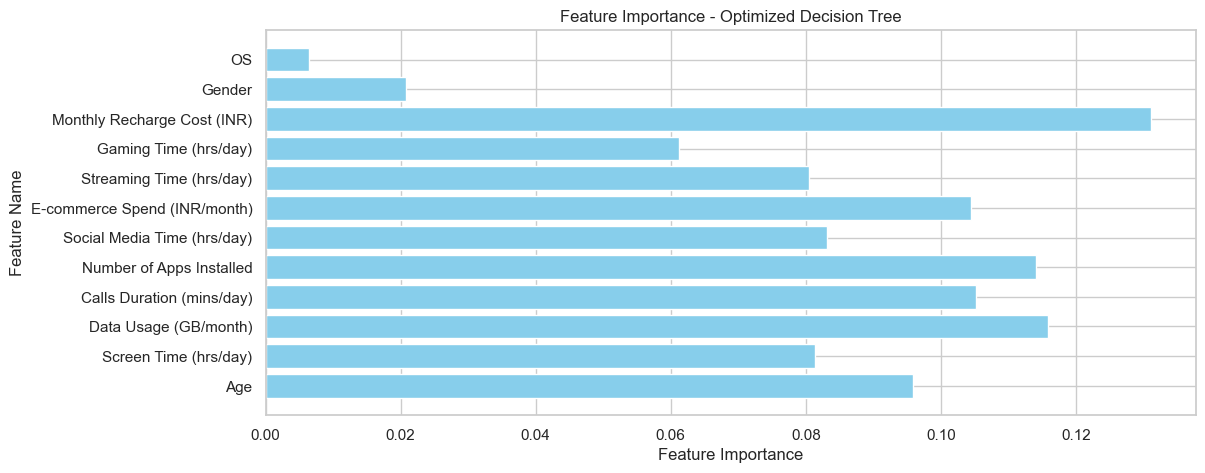

In [42]:
# Get feature importance from the best Decision Tree model
feature_importance = best_dt.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 5))
plt.barh(feature_cols, feature_importance, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance - Optimized Decision Tree")
plt.show()

In [43]:
# Remove low-importance features (OS, Gender)
important_features = [
    "Monthly Recharge Cost (INR)", "Gaming Time (hrs/day)", "Streaming Time (hrs/day)",
    "E-commerce Spend (INR/month)", "Social Media Time (hrs/day)", "Number of Apps Installed",
    "Calls Duration (mins/day)", "Data Usage (GB/month)", "Screen Time (hrs/day)", "Age"
]

# Update X dataset
X_filtered = df[important_features]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Train Decision Tree Again
dt = DecisionTreeClassifier(max_depth=15, min_samples_split=10, min_samples_leaf=1, random_state=42)
dt.fit(X_train, y_train)

# Save the updated model
with open("decision_tree_model.pkl", "wb") as model_file:
    pickle.dump(dt, model_file)

print("✅ Retrained Decision Tree model saved as decision_tree_model.pkl")

✅ Retrained Decision Tree model saved as decision_tree_model.pkl


Clustering

In [44]:
from tqdm import tqdm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

Performing K-means Analysis...


Analyzing K-means: 100%|██████████| 5/5 [00:27<00:00,  5.58s/it]


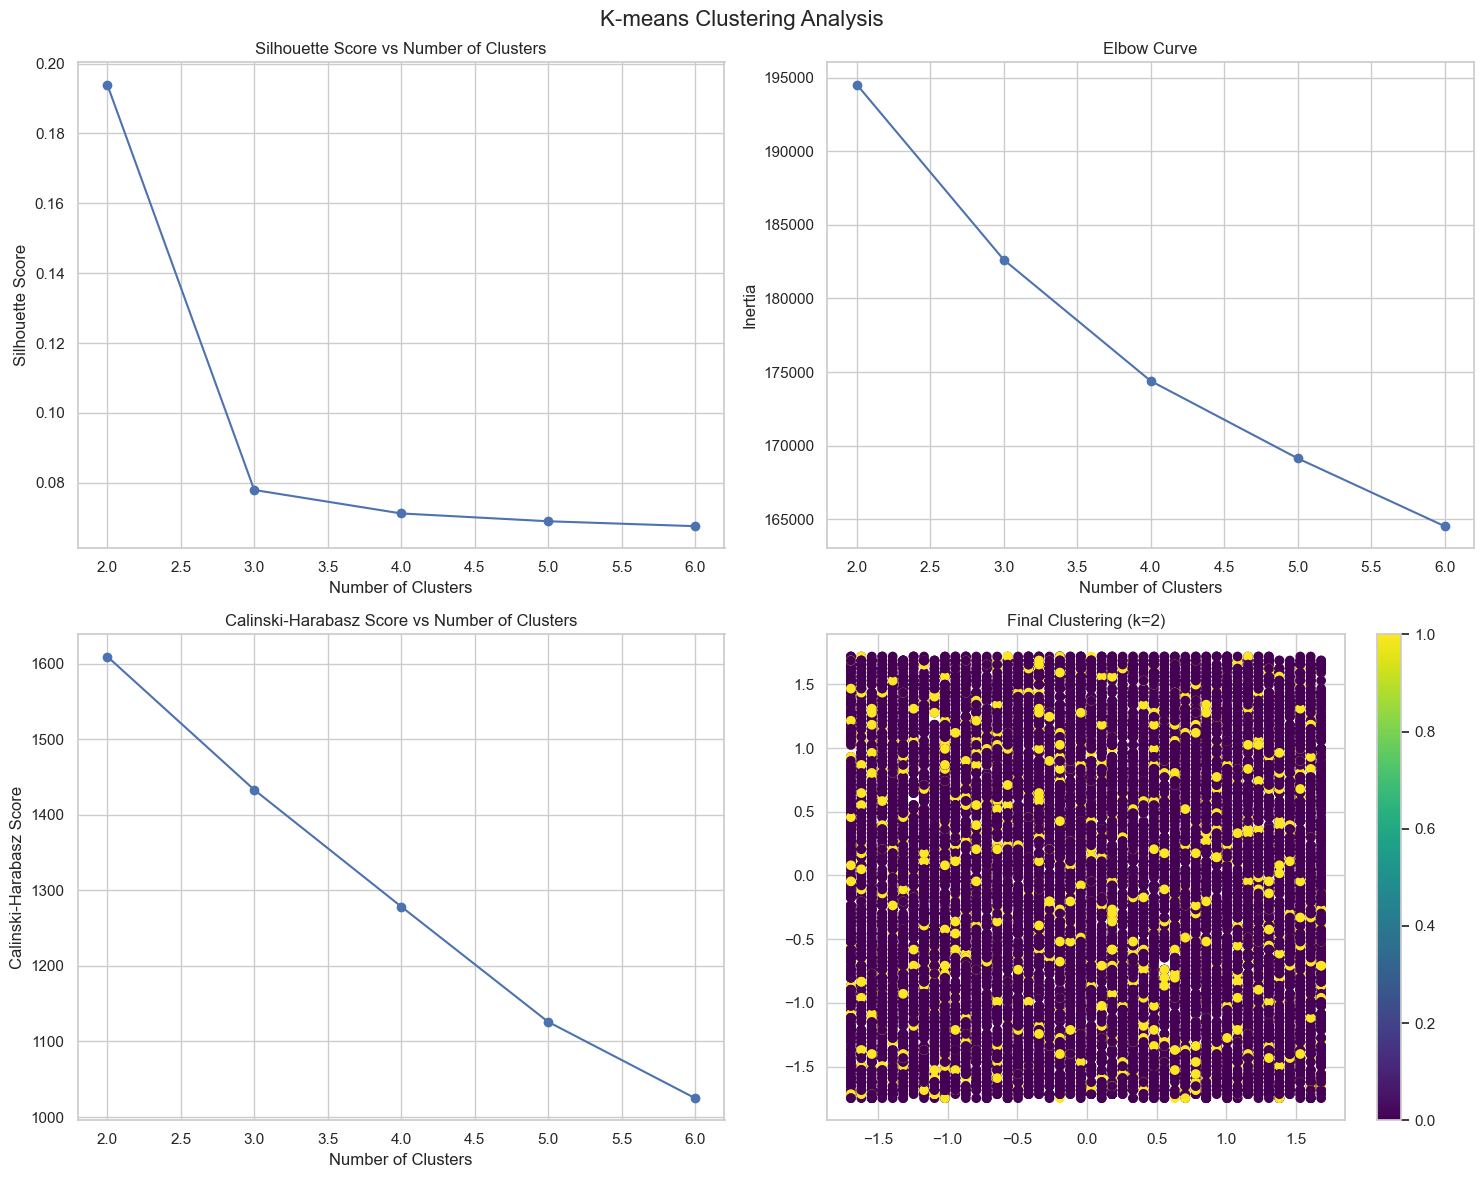

In [45]:
# K-means
def analyze_kmeans(X, n_clusters_range=range(2, 7)):
    """
    Detailed K-means clustering analysis with multiple metrics
    """
    print("Performing K-means Analysis...")
    results = {
        'silhouette_scores': [],
        'inertia_scores': [],
        'calinski_scores': []
    }
    
    # Calculate metrics for different cluster numbers
    for n_clusters in tqdm(n_clusters_range, desc="Analyzing K-means"):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        
        results['silhouette_scores'].append(silhouette_score(X, labels))
        results['inertia_scores'].append(kmeans.inertia_)
        results['calinski_scores'].append(calinski_harabasz_score(X, labels))
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('K-means Clustering Analysis', fontsize=16)
    
    # Plot 1: Silhouette scores
    axes[0, 0].plot(list(n_clusters_range), results['silhouette_scores'], marker='o')
    axes[0, 0].set_title('Silhouette Score vs Number of Clusters')
    axes[0, 0].set_xlabel('Number of Clusters')
    axes[0, 0].set_ylabel('Silhouette Score')
    
    # Plot 2: Elbow curve
    axes[0, 1].plot(list(n_clusters_range), results['inertia_scores'], marker='o')
    axes[0, 1].set_title('Elbow Curve')
    axes[0, 1].set_xlabel('Number of Clusters')
    axes[0, 1].set_ylabel('Inertia')
    
    # Plot 3: Calinski-Harabasz scores
    axes[1, 0].plot(list(n_clusters_range), results['calinski_scores'], marker='o')
    axes[1, 0].set_title('Calinski-Harabasz Score vs Number of Clusters')
    axes[1, 0].set_xlabel('Number of Clusters')
    axes[1, 0].set_ylabel('Calinski-Harabasz Score')
    
    # Find optimal number of clusters
    optimal_clusters = n_clusters_range[np.argmax(results['silhouette_scores'])]
    
    # Final clustering with optimal number
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    # Plot 4: Final clustering result
    scatter = axes[1, 1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    axes[1, 1].set_title(f'Final Clustering (k={optimal_clusters})')
    plt.colorbar(scatter, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    return labels, optimal_clusters, kmeans.cluster_centers_
kmeans_labels, optimal_k, centers = analyze_kmeans(X_scaled)

Performing Hierarchical Clustering Analysis...


Analyzing Hierarchical: 100%|██████████| 5/5 [01:18<00:00, 15.75s/it]


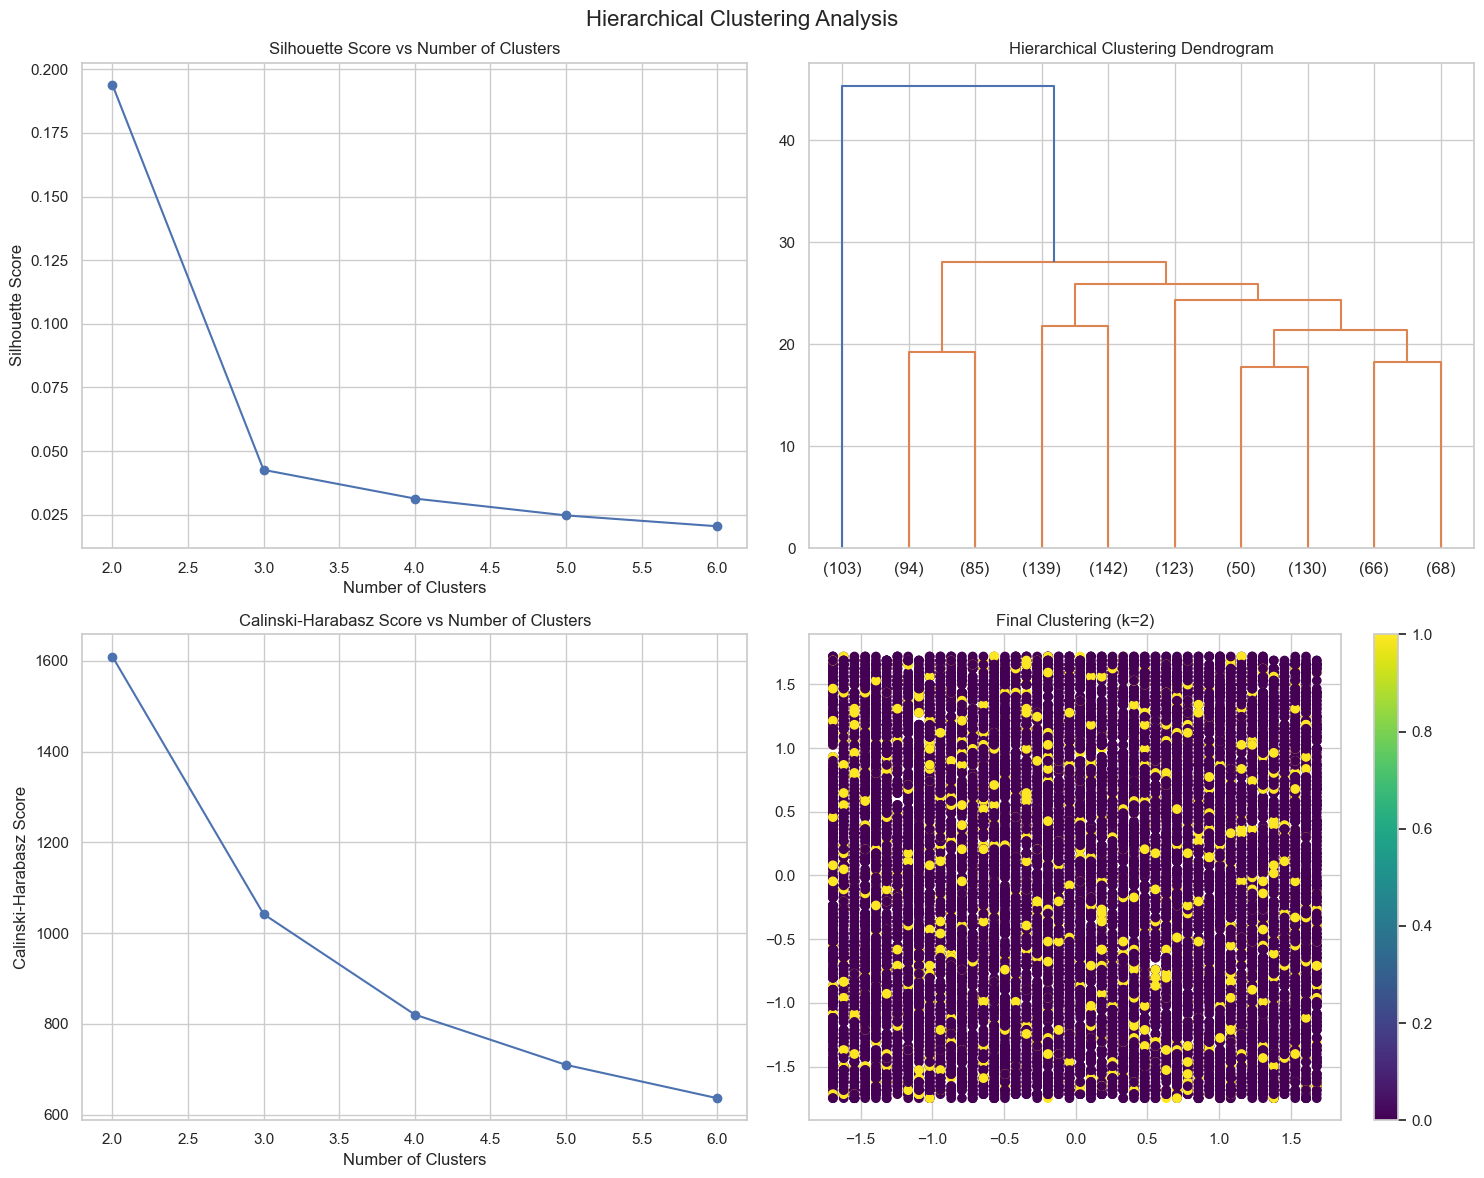

In [46]:
#hierarichical clustering
def analyze_hierarchical(X, n_clusters_range=range(2, 7)):
    """
    Detailed hierarchical clustering analysis
    """
    print("Performing Hierarchical Clustering Analysis...")
    results = {
        'silhouette_scores': [],
        'calinski_scores': []
    }
    
    # Calculate metrics for different cluster numbers
    for n_clusters in tqdm(n_clusters_range, desc="Analyzing Hierarchical"):
        hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
        labels = hierarchical.fit_predict(X)
        
        results['silhouette_scores'].append(silhouette_score(X, labels))
        results['calinski_scores'].append(calinski_harabasz_score(X, labels))
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Hierarchical Clustering Analysis', fontsize=16)
    
    # Plot 1: Silhouette scores
    axes[0, 0].plot(list(n_clusters_range), results['silhouette_scores'], marker='o')
    axes[0, 0].set_title('Silhouette Score vs Number of Clusters')
    axes[0, 0].set_xlabel('Number of Clusters')
    axes[0, 0].set_ylabel('Silhouette Score')
    
    # Plot 2: Dendrogram
    if X.shape[0] > 1000:
        indices = np.random.choice(X.shape[0], 1000, replace=False)
        X_sample = X[indices]
        linkage_matrix = linkage(X_sample, method='ward')
    else:
        linkage_matrix = linkage(X, method='ward')
    
    dendrogram(linkage_matrix, ax=axes[0, 1], truncate_mode='lastp', p=10)
    axes[0, 1].set_title('Hierarchical Clustering Dendrogram')
    
    # Plot 3: Calinski-Harabasz scores
    axes[1, 0].plot(list(n_clusters_range), results['calinski_scores'], marker='o')
    axes[1, 0].set_title('Calinski-Harabasz Score vs Number of Clusters')
    axes[1, 0].set_xlabel('Number of Clusters')
    axes[1, 0].set_ylabel('Calinski-Harabasz Score')
    
    # Find optimal number of clusters
    optimal_clusters = n_clusters_range[np.argmax(results['silhouette_scores'])]
    
    # Final clustering with optimal number
    hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
    labels = hierarchical.fit_predict(X)
    
    # Plot 4: Final clustering result
    scatter = axes[1, 1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    axes[1, 1].set_title(f'Final Clustering (k={optimal_clusters})')
    plt.colorbar(scatter, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    return labels, optimal_clusters
hierarchical_labels, optimal_h = analyze_hierarchical(X_scaled)

Performing DBSCAN Analysis...


Analyzing DBSCAN: 100%|██████████| 10/10 [01:42<00:00, 10.27s/it]


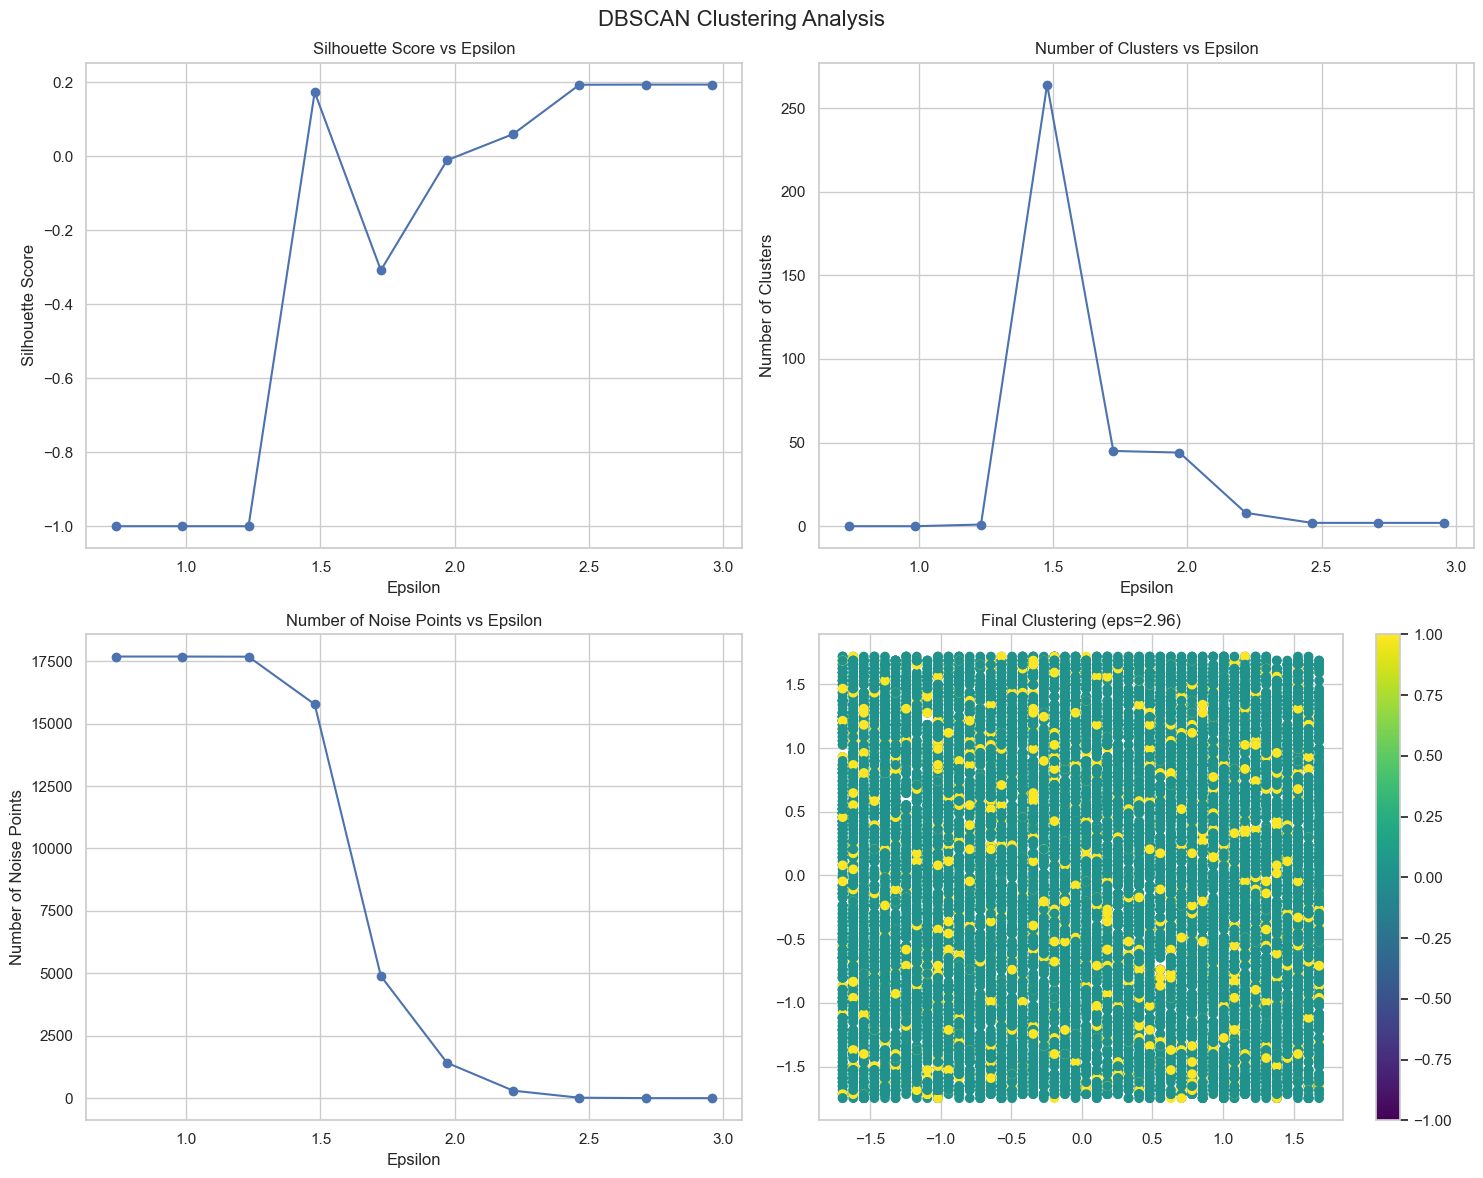

In [47]:
# DBSCAN
def analyze_dbscan(X):
    """
    Detailed DBSCAN clustering analysis
    """
    print("Performing DBSCAN Analysis...")
    
    
   # Determine eps range dynamically based on data
    from sklearn.neighbors import NearestNeighbors
    neighb = NearestNeighbors(n_neighbors=2)
    neighb.fit(X)
    distances, _ = neighb.kneighbors(X)
    mean_dist = np.mean(distances[:, 1])
    eps_range = np.linspace(mean_dist/2, mean_dist*2, 10)
    
    results = {
        'eps_values': eps_range,
        'silhouette_scores': [],
        'n_clusters': [],
        'n_noise': []
    }
    
    for eps in tqdm(eps_range, desc="Analyzing DBSCAN"):
        dbscan = DBSCAN(eps=eps, min_samples=5)
        labels = dbscan.fit_predict(X)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Only calculate silhouette score if there are at least 2 clusters
        # and not all points are noise
        if n_clusters >= 2 and n_noise < len(X):
            # Filter out noise points for silhouette calculation
            valid_points = labels != -1
            if np.sum(valid_points) > 1:
                sil_score = silhouette_score(X[valid_points], labels[valid_points])
            else:
                sil_score = -1
        else:
            sil_score = -1
            
        results['silhouette_scores'].append(sil_score)
        results['n_clusters'].append(n_clusters)
        results['n_noise'].append(n_noise)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('DBSCAN Clustering Analysis', fontsize=16)
    
    # Plot 1: Silhouette scores
    axes[0, 0].plot(eps_range, results['silhouette_scores'], marker='o')
    axes[0, 0].set_title('Silhouette Score vs Epsilon')
    axes[0, 0].set_xlabel('Epsilon')
    axes[0, 0].set_ylabel('Silhouette Score')
    
    # Plot 2: Number of clusters
    axes[0, 1].plot(eps_range, results['n_clusters'], marker='o')
    axes[0, 1].set_title('Number of Clusters vs Epsilon')
    axes[0, 1].set_xlabel('Epsilon')
    axes[0, 1].set_ylabel('Number of Clusters')
    
    # Plot 3: Number of noise points
    axes[1, 0].plot(eps_range, results['n_noise'], marker='o')
    axes[1, 0].set_title('Number of Noise Points vs Epsilon')
    axes[1, 0].set_xlabel('Epsilon')
    axes[1, 0].set_ylabel('Number of Noise Points')
    
    # Find optimal epsilon (handling the case where all scores are -1)
    valid_scores = np.array(results['silhouette_scores'])
    if np.all(valid_scores == -1):
        # If no good clusters found, choose eps that minimizes noise points
        optimal_eps = eps_range[np.argmin(results['n_noise'])]
    else:
        # Otherwise choose eps with best silhouette score
        optimal_eps = eps_range[np.argmax(valid_scores)]
    
    # Final clustering with optimal epsilon
    dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    
    # Plot 4: Final clustering result
    scatter = axes[1, 1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    axes[1, 1].set_title(f'Final Clustering (eps={optimal_eps:.2f})')
    plt.colorbar(scatter, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    return labels, optimal_eps
dbscan_labels, optimal_eps = analyze_dbscan(X_scaled)

Performing GMM Analysis...


Analyzing GMM:   0%|          | 0/5 [00:00<?, ?it/s]

Analyzing GMM: 100%|██████████| 5/5 [00:31<00:00,  6.40s/it]


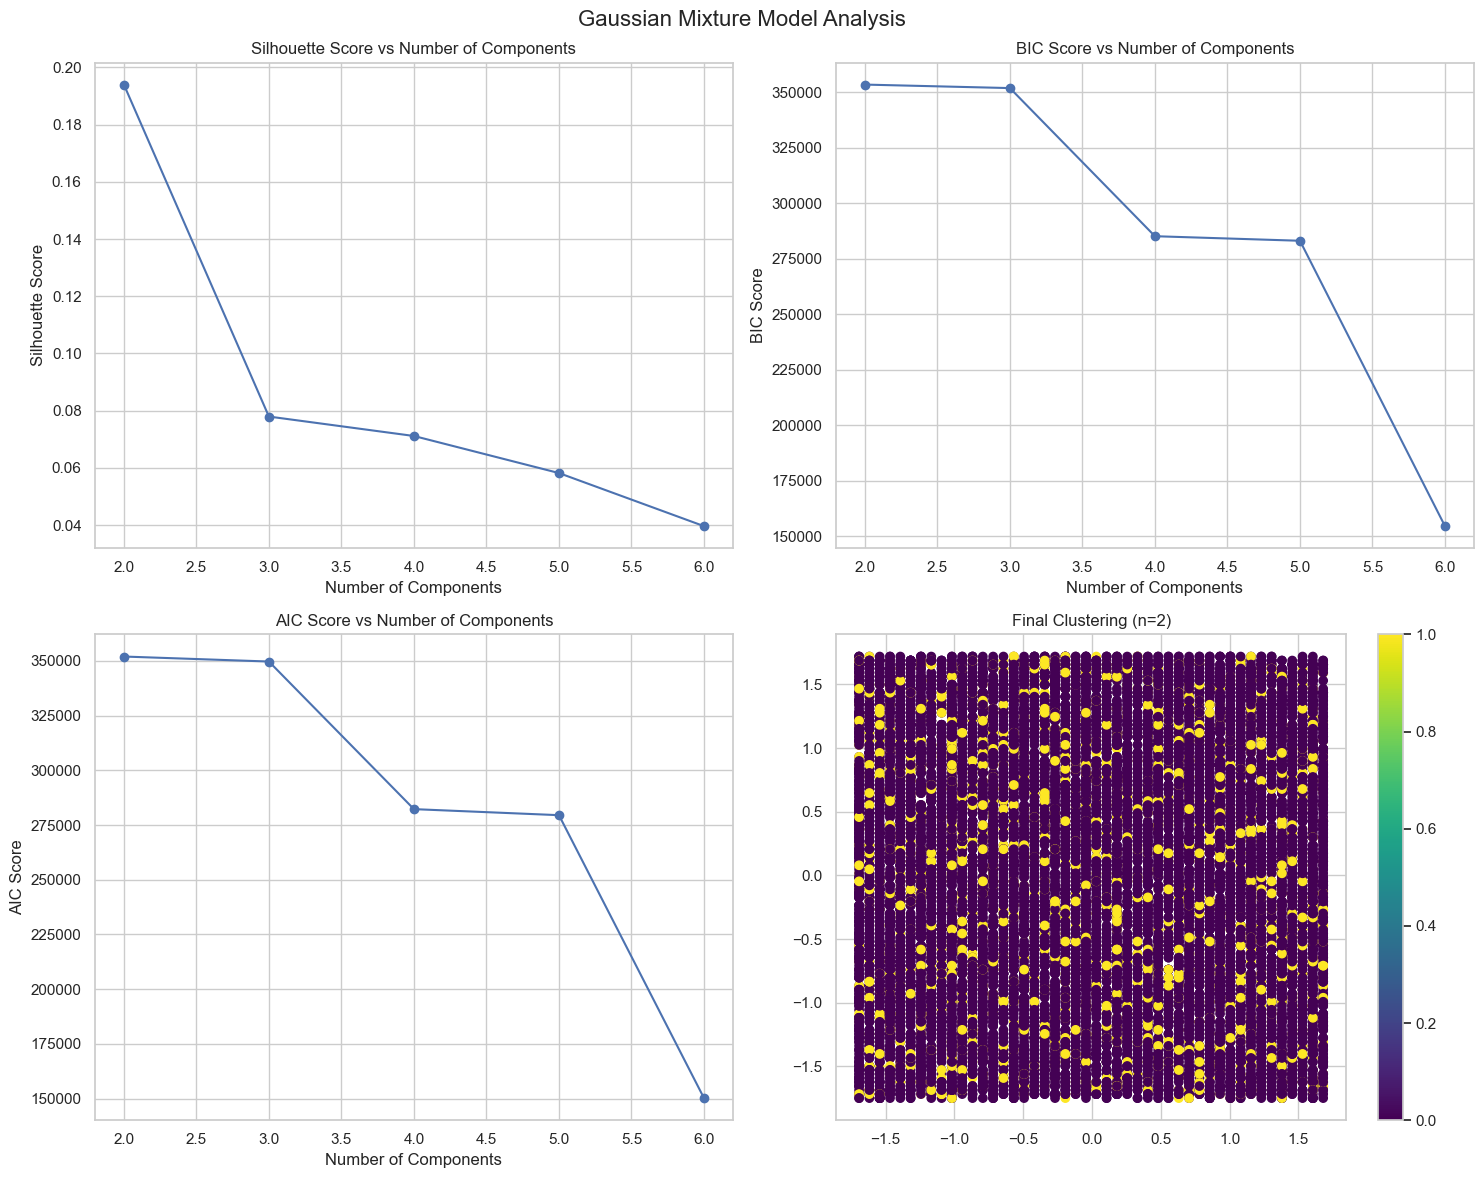

In [48]:
#GMM
def analyze_gmm(X, n_components_range=range(2, 7)):
    """
    Detailed Gaussian Mixture Model analysis
    """
    print("Performing GMM Analysis...")
    results = {
        'silhouette_scores': [],
        'bic_scores': [],
        'aic_scores': []
    }
    
    for n_components in tqdm(n_components_range, desc="Analyzing GMM"):
        gmm = GaussianMixture(n_components=n_components, random_state=42, n_init=5)
        labels = gmm.fit_predict(X)
        
        results['silhouette_scores'].append(silhouette_score(X, labels))
        results['bic_scores'].append(gmm.bic(X))
        results['aic_scores'].append(gmm.aic(X))
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Gaussian Mixture Model Analysis', fontsize=16)
    
    # Plot 1: Silhouette scores
    axes[0, 0].plot(list(n_components_range), results['silhouette_scores'], marker='o')
    axes[0, 0].set_title('Silhouette Score vs Number of Components')
    axes[0, 0].set_xlabel('Number of Components')
    axes[0, 0].set_ylabel('Silhouette Score')
    
    # Plot 2: BIC scores
    axes[0, 1].plot(list(n_components_range), results['bic_scores'], marker='o')
    axes[0, 1].set_title('BIC Score vs Number of Components')
    axes[0, 1].set_xlabel('Number of Components')
    axes[0, 1].set_ylabel('BIC Score')
    
    # Plot 3: AIC scores
    axes[1, 0].plot(list(n_components_range), results['aic_scores'], marker='o')
    axes[1, 0].set_title('AIC Score vs Number of Components')
    axes[1, 0].set_xlabel('Number of Components')
    axes[1, 0].set_ylabel('AIC Score')
    
    # Find optimal number of components
    optimal_components = n_components_range[np.argmax(results['silhouette_scores'])]
    
    # Final clustering with optimal components
    gmm = GaussianMixture(n_components=optimal_components, random_state=42, n_init=5)
    labels = gmm.fit_predict(X)
    
    # Plot 4: Final clustering result
    scatter = axes[1, 1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    axes[1, 1].set_title(f'Final Clustering (n={optimal_components})')
    plt.colorbar(scatter, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    return labels, optimal_components
gmm_labels, optimal_components = analyze_gmm(X_scaled)

Performing Spectral Clustering Analysis...


Analyzing Spectral Clustering: 100%|██████████| 5/5 [26:31<00:00, 318.24s/it]


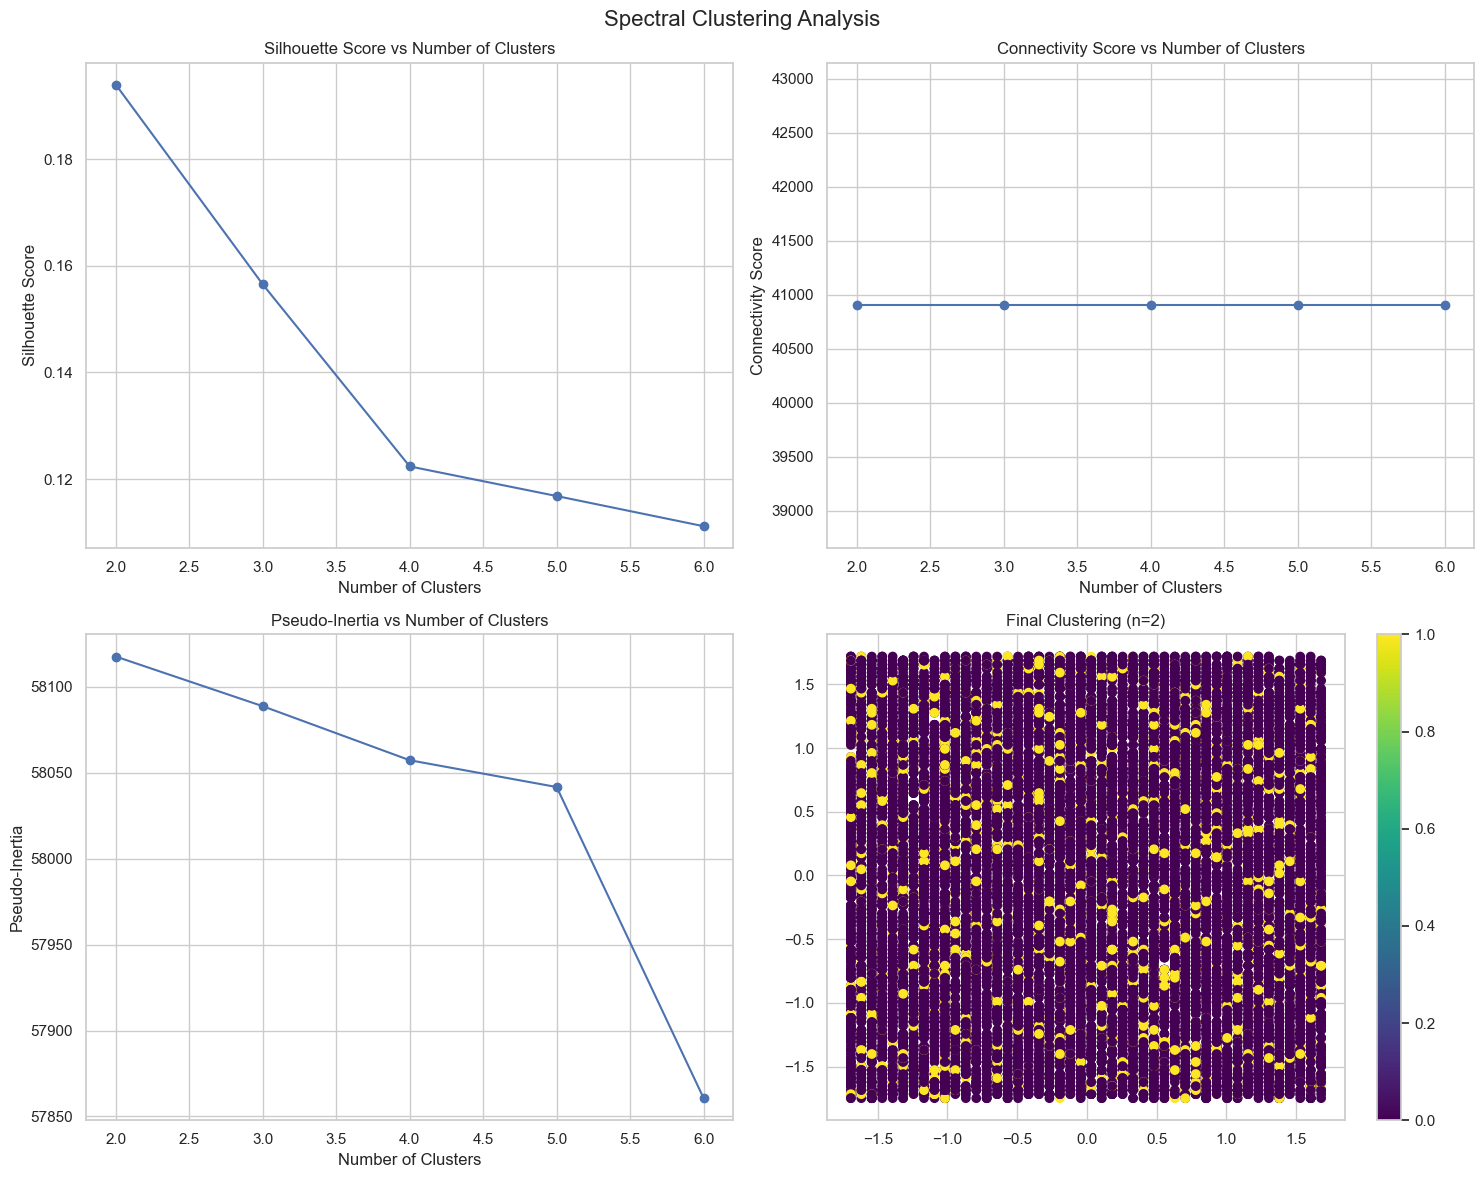

In [49]:
# Spectral Clustering
def analyze_spectral(X, n_clusters_range=range(2, 7), affinity='rbf'):
    """
    Detailed Spectral Clustering analysis with various metrics and visualizations
    
    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        Training data
    n_clusters_range : range
        Range of number of clusters to try
    affinity : str, default='rbf'
        Type of affinity matrix to use ('rbf', 'nearest_neighbors', etc.)
        
    Returns:
    --------
    labels : array-like
        Cluster labels for optimal clustering
    optimal_clusters : int
        Optimal number of clusters determined by silhouette score
    """
    print("Performing Spectral Clustering Analysis...")
    results = {
        'silhouette_scores': [],
        'inertia_scores': [],
        'connectivity_scores': []
    }
    
    for n_clusters in tqdm(n_clusters_range, desc="Analyzing Spectral Clustering"):
        # Fit spectral clustering
        spectral = SpectralClustering(
            n_clusters=n_clusters,
            affinity=affinity,
            random_state=42
        )
        labels = spectral.fit_predict(X)
        
        # Calculate metrics
        results['silhouette_scores'].append(silhouette_score(X, labels))
        
        # Calculate custom connectivity score (ratio of within-cluster to between-cluster distances)
        distances = np.sum(spectral.affinity_matrix_)
        results['connectivity_scores'].append(distances)
        
        # Calculate pseudo-inertia (since spectral clustering doesn't have true inertia)
        centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        inertia = sum(np.min(np.linalg.norm(X - centroids[:, np.newaxis], axis=2), axis=0))
        results['inertia_scores'].append(inertia)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Spectral Clustering Analysis', fontsize=16)
    
    # Plot 1: Silhouette scores
    axes[0, 0].plot(list(n_clusters_range), results['silhouette_scores'], marker='o')
    axes[0, 0].set_title('Silhouette Score vs Number of Clusters')
    axes[0, 0].set_xlabel('Number of Clusters')
    axes[0, 0].set_ylabel('Silhouette Score')
    
    # Plot 2: Connectivity scores
    axes[0, 1].plot(list(n_clusters_range), results['connectivity_scores'], marker='o')
    axes[0, 1].set_title('Connectivity Score vs Number of Clusters')
    axes[0, 1].set_xlabel('Number of Clusters')
    axes[0, 1].set_ylabel('Connectivity Score')
    
    # Plot 3: Inertia scores
    axes[1, 0].plot(list(n_clusters_range), results['inertia_scores'], marker='o')
    axes[1, 0].set_title('Pseudo-Inertia vs Number of Clusters')
    axes[1, 0].set_xlabel('Number of Clusters')
    axes[1, 0].set_ylabel('Pseudo-Inertia')
    
    # Find optimal number of clusters
    optimal_clusters = n_clusters_range[np.argmax(results['silhouette_scores'])]
    
    # Final clustering with optimal components
    spectral = SpectralClustering(
        n_clusters=optimal_clusters,
        affinity=affinity,
        random_state=42
    )
    labels = spectral.fit_predict(X)
    
    # Plot 4: Final clustering result
    scatter = axes[1, 1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    axes[1, 1].set_title(f'Final Clustering (n={optimal_clusters})')
    plt.colorbar(scatter, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    return labels, optimal_clusters
spectral_labels, optimal_clusters = analyze_spectral(X_scaled)

In [52]:
# Store results
results = {
    'kmeans': kmeans_labels,
    'hierarchical': hierarchical_labels,
    'dbscan': dbscan_labels,
    'gmm': gmm_labels,
    'spectral': spectral_labels
}

# Add labels to original dataframe
for method, labels in results.items():
    df[f'cluster_{method}'] = labels

# Save results
df.to_csv('clustering_results.csv', index=False)
print("Clustering Completed Saving all the labels to clustering_results.csv")

Clustering Completed Saving all the labels to clustering_results.csv
